# **ARTIFICIAL INTELLINGENCE ASSIGNMENT 2025**

This notebook contains the contents of Questions :

1. *Search Algorithms - Informed Search*
2. *CSP-Travel Salesperson Problem: Simulated Annealing*
3. *Adversarial Search*
4. *MDPs – Q-learning*

                                                                                                                                                                                                     


# **QUEATION 1:Search Algorithms - Informed Search**

In this question we used to Informed Search algorithms to get the path from the initial state A to the goal state B in a maze environment   
the 2 Algorithms we used are :  
***Gready Best-First Search*** and ***A Search***




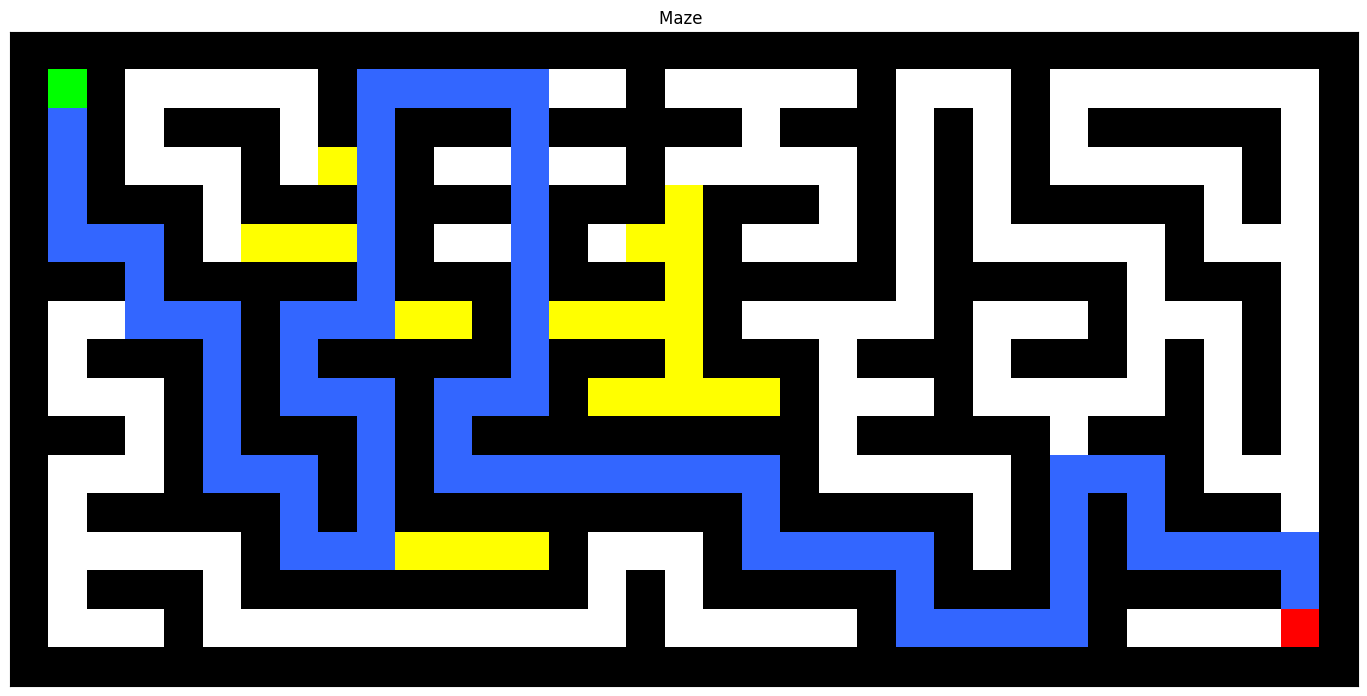

In [1]:
import heapq
import matplotlib.pyplot as plt
import numpy as np


maze3 = """
###################################
#A#     #       #     #   #       #
# # ### # ### ##### ### # # ##### #
# #   #   #     #     # # #     # #
# ### ### ### ### ### # # ##### # #
#   #     #   #   #   # #     #   #
### ##### ### ### ##### ##### ### #
#     #     #     #     #   #   # #
# ### # ##### ### ### ### ### # # #
#   # #   #   #     #   #     # # #
### # ### # ######### ##### ### # #
#   #   # #         #     #   #   #
# ##### # ######### ##### # # ### #
#     #       #   #     # # #     #
# ### ######### # ##### ### ##### #
#   #           #     #     #    B#
###################################
"""

with open("testmaze.txt", "w") as f:
    f.write(maze3.strip())


class Maze:
    def __init__(self, filename):
        self.grid = []
        with open(filename, 'r') as f:
            for row in f:
                self.grid.append(list(row.strip()))

        self.height = len(self.grid)
        self.width = len(self.grid[0])
        self.start, self.goal = None, None
        self.walls = set()

        for row in range(self.height):
            for col in range(self.width):
                if self.grid[row][col] == 'A':
                    self.start = (row, col)
                elif self.grid[row][col] == 'B':
                    self.goal = (row, col)
                elif self.grid[row][col] == '#':
                    self.walls.add((row, col))

        if self.start is None or self.goal is None:
            raise Exception("Maze must have start (A) and goal (B).")

    def neighbors(self, state):
        row, col = state
        directions = [("up", (-1, 0)), ("down", (1, 0)),
                      ("left", (0, -1)), ("right", (0, 1))]
        result = []

        for action, (dr, dc) in directions:
            new_row, new_col = row + dr, col + dc
            if (0 <= new_row < self.height and
                0 <= new_col < self.width and
                (new_row, new_col) not in self.walls):
                result.append((action, (new_row, new_col)))

        return result

class Node:
    def __init__(self, state, parent=None, action=None, cost=0):
        self.state = state  # (row, col)
        self.parent = parent
        self.action = action
        self.cost = cost

    def __lt__(self, other):
        return self.cost < other.cost




def manhattan_distance(a, b):
    return abs(a[0] - b[0]) + abs(a[1] - b[1])



def solve(maze, algorithm="greedy best-first search"):
    start_node = Node(maze.start, cost=0)
    frontier = []
    explored = set()

    if algorithm == "greedy best-first search":
        heapq.heappush(frontier, (manhattan_distance(start_node.state, maze.goal), start_node))
    elif algorithm == "A* search":
        heapq.heappush(frontier, (start_node.cost + manhattan_distance(start_node.state, maze.goal), start_node))
    else:
        raise ValueError("Algorithm must be 'greedy best-first search' or 'A* search'.")

    while frontier:
        _, current = heapq.heappop(frontier)

        if current.state == maze.goal:
            path = []
            while current.parent:
                path.append(current.state)
                current = current.parent
            path.reverse()
            return path, explored

        explored.add(current.state)

        for action, state in maze.neighbors(current.state):
            if state in explored:
                continue
            child = Node(state=state, parent=current, action=action, cost=current.cost + 1)

            if algorithm == "greedy best-first search":
                priority = manhattan_distance(state, maze.goal)
            else:  # A*
                priority = child.cost + manhattan_distance(state, maze.goal)

            heapq.heappush(frontier, (priority, child))

    raise Exception("No path found.")



def visualize_maze(maze, path, explored, filename="maze_1.png"):
    rows, cols = len(maze.grid), len(maze.grid[0])
    image = np.ones((rows, cols, 3))  # Start with white cells

    for r in range(rows):
        for c in range(cols):
            if maze.grid[r][c] == "#":
                image[r, c] = [0,0,0]  # Black for wall
            elif (r, c) in explored:
                image[r, c] = [1, 1, 0]  # Yellow for explored

    for r, c in path:
        image[r, c] = [0.2, 0.4, 1]  # Blue for optimal path

    start_r, start_c = maze.start
    goal_r, goal_c = maze.goal
    image[start_r, start_c] = [0, 1, 0]   # Green for start (A)
    image[goal_r, goal_c] = [1, 0, 0]     # Red for goal (B)

    # Plotting
    plt.figure(figsize=(cols / 2, rows / 2))
    plt.imshow(image, interpolation='nearest')
    plt.xticks([]), plt.yticks([])
    plt.title("Maze ")
    plt.savefig(filename)
    plt.show()




def print_maze(maze, path, explored):
    result = []

    for row in range(maze.height):
        line = []
        for col in range(maze.width):
            cell = (row, col)
            if cell == maze.start:
                line.append('A')
            elif cell == maze.goal:
                line.append('B')
            elif cell in path:
                line.append('*')
            elif cell in explored:
                line.append('.')
            elif cell in maze.walls:
                line.append('#')
            else:
                line.append(' ')
        result.append("".join(line))

    print("\n".join(result))

m = Maze("maze.txt")
path, explored = solve(m, algorithm="greedy best-first search")  
visualize_maze(m, path, explored, filename="maze_1.png")

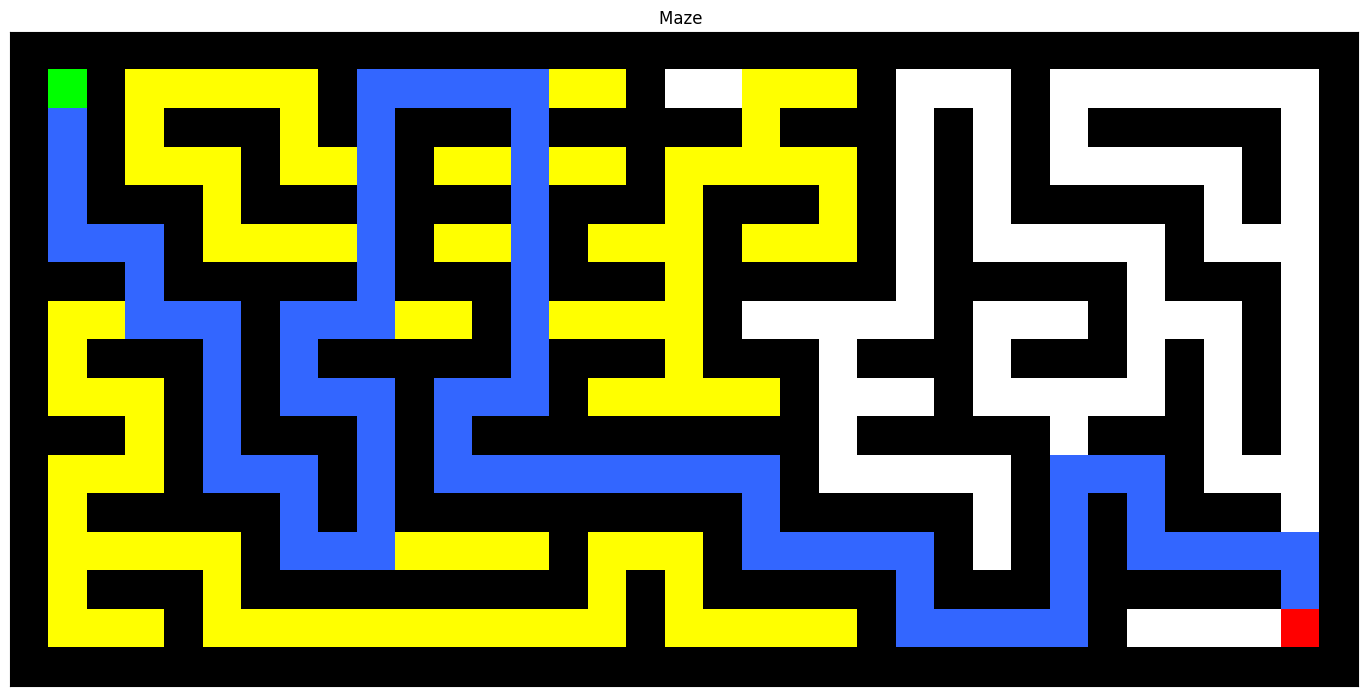

In [6]:
m = Maze("maze.txt")
path, explored = solve(m, algorithm="A* search")  
visualize_maze(m, path, explored, filename="maze_1.png")




# QUESTION 2 CSP-Travel Salesperson Problem: Simulated Annealing 

In this Question we are challenged with a **Travellling Salesman Problem**(**TSP**)  
We used Simulated Annealing and a Search algorithm to find  optimal routes 



Initial route and cumulative distances:
Windhoek: 0 km
Keetmanshoop: 497.00 km
Walvis Bay: 1229.00 km
Grootfontein: 1852.00 km
Otjiwarongo: 2035.00 km
Tsumeb: 2295.00 km
Ondangwa: 2549.00 km
Swakopmund: 3357.00 km
Mariental: 3898.00 km
Oshakati: 4879.00 km
Return to Windhoek: 5591.00 km total


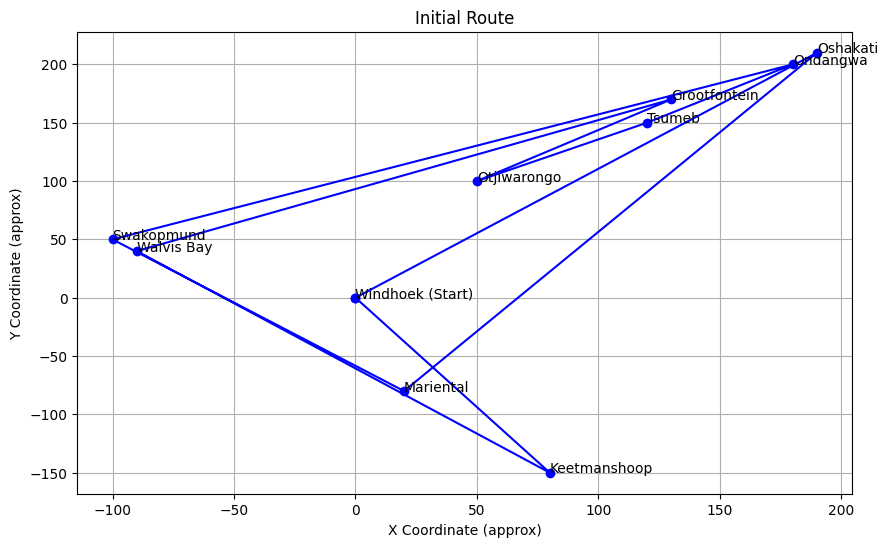


Optimized route and cumulative distances:
Windhoek: 0 km
Mariental: 268.00 km
Keetmanshoop: 499.00 km
Walvis Bay: 1231.00 km
Swakopmund: 1266.50 km
Oshakati: 2045.50 km
Ondangwa: 2075.50 km
Tsumeb: 2329.50 km
Grootfontein: 2389.50 km
Otjiwarongo: 2572.50 km
Return to Windhoek: 2821.50 km total


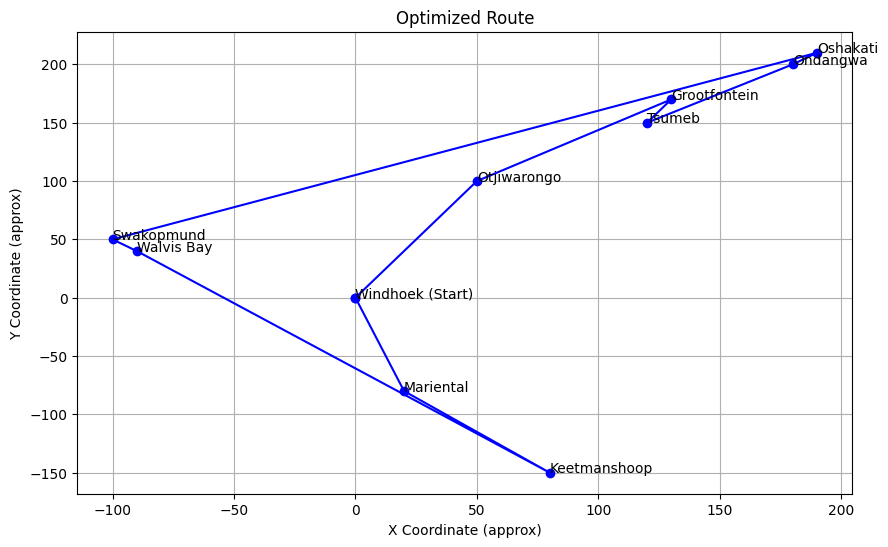


Analysis and Evaluation:
The simulated annealing algorithm starts with a random route and iteratively improves it by swapping towns.
Worse solutions are occasionally accepted to escape local minima, controlled by the cooling schedule.
Parameters such as initial temperature, cooling rate, and iteration limit affect the quality and speed of convergence.
For larger town sets, brute-force is infeasible due to factorial complexity, making simulated annealing a practical approach.
For smaller sets (e.g., 5 towns), brute-force can find the optimal route for comparison.

Brute-force optimal route for first 5 towns: ['Windhoek', 'Walvis Bay', 'Swakopmund', 'Tsumeb', 'Otjiwarongo']
Brute-force optimal distance: 1501.50 km


In [6]:
import random
import math
import matplotlib.pyplot as plt
import itertools

class TSP:
    def __init__(self, towns, distance_matrix):
        self.towns = towns
        self.distance_matrix = distance_matrix
        self.town_index = {town: i for i, town in enumerate(towns)}

    def total_distance(self, route):
        distance = 0
        for i in range(len(route) - 1):
            distance += self.distance_matrix[self.town_index[route[i]]][self.town_index[route[i+1]]]
        # Add distance to return to start
        distance += self.distance_matrix[self.town_index[route[-1]]][self.town_index[route[0]]]
        return distance

class SimulatedAnnealingSolver:
    def __init__(self, tsp, initial_temp=10000, cooling_rate=0.995, iteration_limit=100000):
        self.tsp = tsp
        self.temperature = initial_temp
        self.cooling_rate = cooling_rate
        self.iteration_limit = iteration_limit

    def random_route(self):
        route = self.tsp.towns[1:]  # exclude start town Windhoek
        random.shuffle(route)
        return [self.tsp.towns[0]] + route

    def neighbor(self, route):
        # Swap two towns in the route (excluding the first town which is fixed start)
        new_route = route[:]
        i, j = random.sample(range(1, len(route)), 2)
        new_route[i], new_route[j] = new_route[j], new_route[i]
        return new_route

    def acceptance_probability(self, old_cost, new_cost, temperature):
        if new_cost < old_cost:
            return 1.0
        else:
            return math.exp((old_cost - new_cost) / temperature)

    def solve(self):
        current_route = self.random_route()
        current_cost = self.tsp.total_distance(current_route)
        best_route = current_route[:]
        best_cost = current_cost

        iteration = 0
        while self.temperature > 1e-8 and iteration < self.iteration_limit:
            new_route = self.neighbor(current_route)
            new_cost = self.tsp.total_distance(new_route)

            ap = self.acceptance_probability(current_cost, new_cost, self.temperature)
            if ap > random.random():
                current_route = new_route
                current_cost = new_cost
                if current_cost < best_cost:
                    best_route = current_route[:]
                    best_cost = current_cost

            self.temperature *= self.cooling_rate
            iteration += 1

        return best_route, best_cost

def plot_route(tsp, route, title):
    town_coords = {
        # Approximate coordinates for visualization (not to scale)
        'Windhoek': (0, 0),
        'Swakopmund': (-100, 50),
        'Walvis Bay': (-90, 40),
        'Otjiwarongo': (50, 100),
        'Tsumeb': (120, 150),
        'Grootfontein': (130, 170),
        'Mariental': (20, -80),
        'Keetmanshoop': (80, -150),
        'Ondangwa': (180, 200),
        'Oshakati': (190, 210)
    }

    x = [town_coords[town][0] for town in route] + [town_coords[route[0]][0]]
    y = [town_coords[town][1] for town in route] + [town_coords[route[0]][1]]

    plt.figure(figsize=(10,6))
    plt.plot(x, y, 'o-', color='blue')
    for i, town in enumerate(route):
        label = town
        if i == 0:
            label += " (Start)"
        plt.text(town_coords[town][0], town_coords[town][1], label)
    plt.title(title)
    plt.xlabel('X Coordinate (approx)')
    plt.ylabel('Y Coordinate (approx)')
    plt.grid(True)
    plt.show()

def brute_force_tsp(tsp):
    # Only for small sets (e.g., 5 towns) due to factorial complexity
    towns = tsp.towns[1:]  # exclude start town
    start = tsp.towns[0]
    best_route = None
    best_cost = float('inf')
    for perm in itertools.permutations(towns):
        route = [start] + list(perm)
        cost = tsp.total_distance(route)
        if cost < best_cost:
            best_cost = cost
            best_route = route
    return best_route, best_cost

def main():
    towns = ['Windhoek', 'Swakopmund', 'Walvis Bay', 'Otjiwarongo', 'Tsumeb', 'Grootfontein', 'Mariental', 'Keetmanshoop', 'Ondangwa', 'Oshakati']
    distance_matrix = [
        [0, 361, 395, 249, 433, 459, 268, 497, 678, 712],
        [361, 0, 35.5, 379, 562, 589, 541, 859, 808, 779],
        [395, 35.5, 0, 413, 597, 623, 511, 732, 884, 855],
        [249, 379, 413, 0, 260, 183, 519, 768, 514, 485],
        [433, 562, 597, 260, 0, 60, 682, 921, 254, 288],
        [459, 589, 623, 183, 60, 0, 708, 947, 308, 342],
        [268, 541, 511, 519, 682, 708, 0, 231, 909, 981],
        [497, 859, 732, 768, 921, 947, 231, 0, 1175, 1210],
        [678, 808, 884, 514, 254, 308, 909, 1175, 0, 30],
        [712, 779, 855, 485, 288, 342, 981, 1210, 30, 0]
    ]

    tsp = TSP(towns, distance_matrix)
    solver = SimulatedAnnealingSolver(tsp)

    initial_route = solver.random_route()
    initial_distance = tsp.total_distance(initial_route)
    print("Initial route and cumulative distances:")
    cumulative_distance = 0
    for i in range(len(initial_route)):
        if i == 0:
            print(f"{initial_route[i]}: 0 km")
        else:
            prev = initial_route[i-1]
            curr = initial_route[i]
            dist = distance_matrix[towns.index(prev)][towns.index(curr)]
            cumulative_distance += dist
            print(f"{curr}: {cumulative_distance:.2f} km")
    # Add distance to return to start
    cumulative_distance += distance_matrix[towns.index(initial_route[-1])][towns.index(initial_route[0])]
    print(f"Return to {initial_route[0]}: {cumulative_distance:.2f} km total")
    plot_route(tsp, initial_route, "Initial Route")

    best_route, best_distance = solver.solve()
    print("\nOptimized route and cumulative distances:")
    cumulative_distance = 0
    for i in range(len(best_route)):
        if i == 0:
            print(f"{best_route[i]}: 0 km")
        else:
            prev = best_route[i-1]
            curr = best_route[i]
            dist = distance_matrix[towns.index(prev)][towns.index(curr)]
            cumulative_distance += dist
            print(f"{curr}: {cumulative_distance:.2f} km")
    # Add distance to return to start
    cumulative_distance += distance_matrix[towns.index(best_route[-1])][towns.index(best_route[0])]
    print(f"Return to {best_route[0]}: {cumulative_distance:.2f} km total")
    plot_route(tsp, best_route, "Optimized Route")

    # Analysis and evaluation
    print("\nAnalysis and Evaluation:")
    print("The simulated annealing algorithm starts with a random route and iteratively improves it by swapping towns.")
    print("Worse solutions are occasionally accepted to escape local minima, controlled by the cooling schedule.")
    print("Parameters such as initial temperature, cooling rate, and iteration limit affect the quality and speed of convergence.")
    print("For larger town sets, brute-force is infeasible due to factorial complexity, making simulated annealing a practical approach.")
    print("For smaller sets (e.g., 5 towns), brute-force can find the optimal route for comparison.")

    # Optional: Compare with brute-force for smaller subset
    small_towns = towns[:5]
    small_distance_matrix = [row[:5] for row in distance_matrix[:5]]
    small_tsp = TSP(small_towns, small_distance_matrix)
    bf_route, bf_distance = brute_force_tsp(small_tsp)
    print("\nBrute-force optimal route for first 5 towns:", bf_route)
    print(f"Brute-force optimal distance: {bf_distance:.2f} km")


if __name__ == "__main__":
    main()

# Question 3: Adversarial Search 
In this task, we will apply the ***Minimax algorithm*** to build an AI
agent that plays Tic Tac Toe optimally.lly.

In [5]:
import copy

# Constants to represent players and empty cells
X = "X"
O = "O"
EMPTY = None

# Start with an empty 3x3 board
def initial_state():
    return [[EMPTY, EMPTY, EMPTY],
            [EMPTY, EMPTY, EMPTY],
            [EMPTY, EMPTY, EMPTY]]

# Determine who the current player is (X starts first)
def player(board):
    x_moves = sum(row.count(X) for row in board)
    o_moves = sum(row.count(O) for row in board)
    return X if x_moves == o_moves else O

# Return all available (empty) positions as a set of (row, column) tuples
def actions(board):
    possible_moves = set()
    for i in range(3):
        for j in range(3):
            if board[i][j] == EMPTY:
                possible_moves.add((i, j))
    return possible_moves

# Apply a move to the board and return a new board without changing the original
def result(board, action):
    i, j = action
    if board[i][j] != EMPTY:
        raise Exception("Invalid move: cell already taken.")
    
    # Copy the board and apply the move
    new_board = copy.deepcopy(board)
    new_board[i][j] = player(board)
    return new_board

# Check if there's a winner (X or O), or return None
def winner(board):
    # Check rows and columns
    for i in range(3):
        if board[i][0] == board[i][1] == board[i][2] and board[i][0] != EMPTY:
            return board[i][0]
        if board[0][i] == board[1][i] == board[2][i] and board[0][i] != EMPTY:
            return board[0][i]
    
    # Check diagonals
    if board[0][0] == board[1][1] == board[2][2] and board[0][0] != EMPTY:
        return board[0][0]
    if board[0][2] == board[1][1] == board[2][0] and board[0][2] != EMPTY:
        return board[0][2]
    
    return None

# Check if the game is over (someone won or board is full)
def terminal(board):
    return winner(board) is not None or all(cell is not EMPTY for row in board for cell in row)

# Give a score: +1 if X wins, -1 if O wins, 0 for a tie
def utility(board):
    win = winner(board)
    if win == X:
        return 1
    elif win == O:
        return -1
    else:
        return 0

# Minimax algorithm to choose the best move
def minimax(board):
    if terminal(board):
        return None

    current_player = player(board)

    # Best score for X (maximize)
    def max_value(board):
        if terminal(board):
            return utility(board)
        value = float('-inf')
        for action in actions(board):
            value = max(value, min_value(result(board, action)))
        return value

    # Best score for O (minimize)
    def min_value(board):
        if terminal(board):
            return utility(board)
        value = float('inf')
        for action in actions(board):
            value = min(value, max_value(result(board, action)))
        return value

    best_action = None

    if current_player == X:
        best_score = float('-inf')
        for action in actions(board):
            score = min_value(result(board, action))
            if score > best_score:
                best_score = score
                best_action = action
    else:
        best_score = float('inf')
        for action in actions(board):
            score = max_value(result(board, action))
            if score < best_score:
                best_score = score
                best_action = action

    return best_action

# Question 4: MDPs – Q-learning

Our task is to write a program to implement the **Q-learning algorithm** to find the optimal 
value function and policy of the gridworld model =


In [12]:
import numpy as np

# Gridworld setup
grid_size = (5, 5)
special_states = {'A': (0, 1), 'B': (0, 3)}
next_to_states = {"A'": (4, 1), "B'": (2, 3)}
special_rewards = {'A': 10, 'B': 5}
default_reward = 0
edge_penalty = -1

# Actions: north, south, east, west
actions = ['north', 'south', 'east', 'west']
action_arrows = {'north': '↑', 'south': '↓', 'east': '→', 'west': '←'}

# Q-learning parameters
gamma = 0.9  # Discount factor
epsilon = 0.1  # Exploration rate
alpha = 0.2  # Learning rate
episodes = 5000
steps_per_episode = 5000

# Initialize Q-values
Q = np.zeros((grid_size[0], grid_size[1], len(actions)))

def get_next_state(state, action):
    row, col = state
    if action == 'north':
        next_row, next_col = row - 1, col
    elif action == 'south':
        next_row, next_col = row + 1, col
    elif action == 'east':
        next_row, next_col = row, col + 1
    elif action == 'west':
        next_row, next_col = row, col - 1
    
    # Check if next state is valid
    if (0 <= next_row < grid_size[0]) and (0 <= next_col < grid_size[1]):
        return (next_row, next_col)
    else:
        return state  # Stay in place if off-grid

def get_reward(state, action):
    # Check for special states
    for special_state, pos in special_states.items():
        if state == pos:
            return special_rewards[special_state]
    
    # Check if action leads off-grid
    next_state = get_next_state(state, action)
    if next_state == state:  # Hit edge
        return edge_penalty
    else:
        return default_reward

def get_teleport_state(state):
    # Teleport from A to A' or B to B'
    for special_state, pos in special_states.items():
        if state == pos:
            return next_to_states.get(f"{special_state}'", state)
    return state

# Q-learning algorithm
for episode in range(episodes):
    state = (np.random.randint(grid_size[0]), np.random.randint(grid_size[1]))  # Random start
    for step in range(steps_per_episode):
        # Epsilon-greedy action selection
        if np.random.rand() < epsilon:
            action = np.random.choice(actions)
        else:
            action_idx = np.argmax(Q[state[0], state[1], :])
            action = actions[action_idx]
        
        # Execute action
        next_state = get_next_state(state, action)
        reward = get_reward(state, action)
        
        # Handle teleportation for special states
        if state in special_states.values():
            next_state = get_teleport_state(state)
        
        # Q-value update
        best_next_action = np.argmax(Q[next_state[0], next_state[1], :])
        td_target = reward + gamma * Q[next_state[0], next_state[1], best_next_action]
        td_error = td_target - Q[state[0], state[1], actions.index(action)]
        Q[state[0], state[1], actions.index(action)] += alpha * td_error
        
        state = next_state

# Extract optimal value function and policy
optimal_value_function = np.max(Q, axis=2)
optimal_policy_indices = np.argmax(Q, axis=2)
optimal_policy = [[actions[idx] for idx in row] for row in optimal_policy_indices]
optimal_policy_arrows = [[action_arrows[action] for action in row] for row in optimal_policy]

# Print results
print("$ python gridworld_qlearning.py")
print("Initializing Gridworld...")
print(f"Grid size: {grid_size[0]}x{grid_size[1]}")
print(f"Special_states = {special_states}")
print(f"Next_to_states = {next_to_states}")
print(f"Special_rewards = {special_rewards}")
print("Starting Q-learning with parameters:")
print(f"  γ = {gamma}")
print(f"  ε = {epsilon}")
print(f"  α = {alpha}")
print(f"  Episodes = {episodes}")
print(f"  Steps = {steps_per_episode}\n")
print("Evaluating optimal value function and policy...")
print("Optimal Value Function:")
for row in optimal_value_function:
    print("  ".join(f"{val:5.2f}" for val in row))
print("\nOptimal Policy:")
for row in optimal_policy:
    print("  ".join(f"{action:<6}" for action in row))
print("\nOptimal Policy (arrows):")
for row in optimal_policy_arrows:
    print("  ".join(f"{arrow:^6}" for arrow in row))

$ python gridworld_qlearning.py
Initializing Gridworld...
Grid size: 5x5
Special_states = {'A': (0, 1), 'B': (0, 3)}
Next_to_states = {"A'": (4, 1), "B'": (2, 3)}
Special_rewards = {'A': 10, 'B': 5}
Starting Q-learning with parameters:
  γ = 0.9
  ε = 0.1
  α = 0.2
  Episodes = 5000
  Steps = 5000

Evaluating optimal value function and policy...
Optimal Value Function:
21.98  24.42  21.98  19.42  14.42
19.78  21.98  19.78  17.80  16.02
17.80  19.78  17.80  16.02  14.42
16.02  17.80  16.02  14.42  12.98
14.42  16.02  14.42  12.98  11.68

Optimal Policy:
east    north   west    north   south 
north   north   north   west    west  
north   north   north   north   west  
north   north   north   north   north 
north   north   north   north   north 

Optimal Policy (arrows):
  →       ↑       ←       ↑       ↓   
  ↑       ↑       ↑       ←       ←   
  ↑       ↑       ↑       ↑       ←   
  ↑       ↑       ↑       ↑       ↑   
  ↑       ↑       ↑       ↑       ↑   
